# KNN

In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [2]:
#Load data
data = pd.read_csv(r"C:\Users\User\Desktop\Dataset\DogMoveData_csv_format\DogMoveData_merged.csv")

In [3]:
#Split dataset in features and target variable
feature_cols = ['ABack_x', 'ABack_y', 'ABack_z', 'ANeck_x', 'ANeck_y', 'ANeck_z', 'GBack_x', 'GBack_y', 'GBack_z', 'GNeck_x', 'GNeck_y', 'GNeck_z']
X = data[feature_cols] # Features
y = data['Behavior'] # Target variable

In [4]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [5]:
#
param_grid = [{'n_neighbors': [3,5,7],
         'weights': ['uniform', 'distance']}]
knn_class = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn_class, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=True)

In [9]:
#Best model
final_model = grid_search.best_estimator_
final_model

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [10]:
#Knn Classifier
knn = KNeighborsClassifier(n_neighbors = 7, weights='distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [11]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy", accuracy)

Accuracy 0.8620401019670509


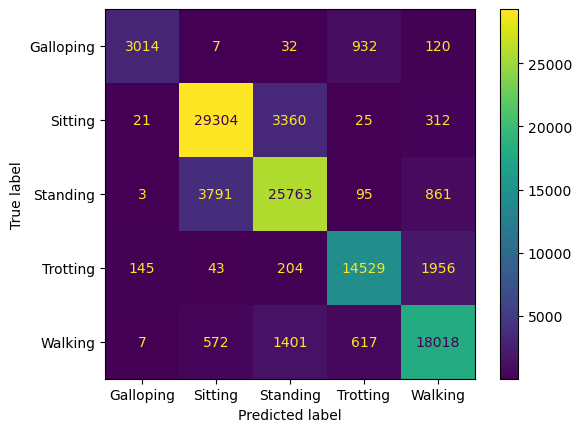

              precision    recall  f1-score   support

   Galloping       0.94      0.73      0.83      4105
     Sitting       0.87      0.89      0.88     33022
    Standing       0.84      0.84      0.84     30513
    Trotting       0.90      0.86      0.88     16877
     Walking       0.85      0.87      0.86     20615

    accuracy                           0.86    105132
   macro avg       0.88      0.84      0.86    105132
weighted avg       0.86      0.86      0.86    105132



In [12]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Galloping', 'Sitting', 'Standing', 'Trotting', 'Walking'])
disp.plot()
plt.show()
print(classification_report(y_test, y_pred))